In [1]:
# import libraries.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
# define constants.
MY_WIND_TURBINE_NAME = 'R80721'
WIND_SPEED_COLUMN_NAME = 'Ws'
WIND_SPEED_AXIS_NAME = 'Wind Speed (' + WIND_SPEED_COLUMN_NAME + ')'
PITCH_ANGLE_COLUMN_NAME = 'Ba'
PITCH_ANGLE_AXIS_NAME = 'Pitch Angle (' + PITCH_ANGLE_COLUMN_NAME + ')'
GRAPH_SUFFIX_TITLE = WIND_SPEED_COLUMN_NAME + '-' + PITCH_ANGLE_COLUMN_NAME + ' Graph of the Wind Turbine ' + MY_WIND_TURBINE_NAME
FILE_NAME_EXTENSION_PNG = '.png'

In [3]:
# read data.
dataframe = pd.read_csv('wind_power_data_2017_2020.csv')

In [4]:
# prepare the dataframe.
my_wind_turbine_dataframe = dataframe.loc[dataframe['Wind_turbine_name'] == MY_WIND_TURBINE_NAME]
ws_ba_dataframe = pd.concat([my_wind_turbine_dataframe[WIND_SPEED_COLUMN_NAME], my_wind_turbine_dataframe[PITCH_ANGLE_COLUMN_NAME]], axis=1, keys=[WIND_SPEED_COLUMN_NAME, PITCH_ANGLE_COLUMN_NAME])
ws_ba_dataframe[WIND_SPEED_COLUMN_NAME].fillna(0, inplace=True)
ws_ba_dataframe[PITCH_ANGLE_COLUMN_NAME].fillna(0, inplace=True)

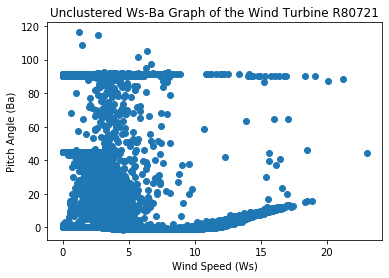

In [5]:
# plot unclustered graph.
UNCLUSTERED_GRAPH_TITLE = 'Unclustered ' + GRAPH_SUFFIX_TITLE
plt.title(UNCLUSTERED_GRAPH_TITLE)
plt.xlabel(WIND_SPEED_AXIS_NAME)
plt.ylabel(PITCH_ANGLE_AXIS_NAME)
plt.scatter(x=ws_ba_dataframe[WIND_SPEED_COLUMN_NAME], y=ws_ba_dataframe[PITCH_ANGLE_COLUMN_NAME]);

In [6]:
# cluster the dataframe with k-means.
kmeans = KMeans(n_clusters=3).fit(ws_ba_dataframe)
centroids = kmeans.cluster_centers_

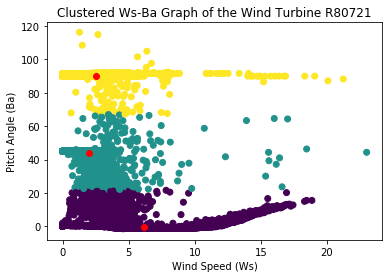

In [7]:
# plot clustered graph.
CLUSTERED_GRAPH_TITLE = 'Clustered ' + GRAPH_SUFFIX_TITLE
plt.title(CLUSTERED_GRAPH_TITLE)
plt.xlabel(WIND_SPEED_AXIS_NAME)
plt.ylabel(PITCH_ANGLE_AXIS_NAME)
plt.scatter(x=ws_ba_dataframe[WIND_SPEED_COLUMN_NAME], y=ws_ba_dataframe[PITCH_ANGLE_COLUMN_NAME], c=kmeans.labels_.astype(float));
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c='red');